Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'ADA'
against_currency = 'USD'

start = dt.datetime(2017,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-30,0.032226,0.017354,0.021678,0.024969,5.006870e+07,0.024969
2017-10-01,0.030088,0.019969,0.024607,0.025932,5.764130e+07,0.025932
2017-10-02,0.027425,0.020690,0.025757,0.020816,1.699780e+07,0.020816
2017-10-03,0.022806,0.020864,0.020864,0.021931,9.000050e+06,0.021931
2017-10-04,0.022154,0.020859,0.021951,0.021489,5.562510e+06,0.021489
...,...,...,...,...,...,...
2021-06-12,1.578513,1.402935,1.480494,1.558359,2.785909e+09,1.558359
2021-06-13,1.592704,1.510411,1.557019,1.575110,2.543903e+09,1.575110
2021-06-14,1.611401,1.545383,1.573870,1.597756,2.553206e+09,1.597756


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1352 entries, 2017-09-30 to 2021-06-18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1352 non-null   float64
 1   Low        1352 non-null   float64
 2   Open       1352 non-null   float64
 3   Close      1352 non-null   float64
 4   Volume     1352 non-null   float64
 5   Adj Close  1352 non-null   float64
 6   Spread     1352 non-null   float64
dtypes: float64(7)
memory usage: 84.5 KB


## Plot the closing value of cardano over time

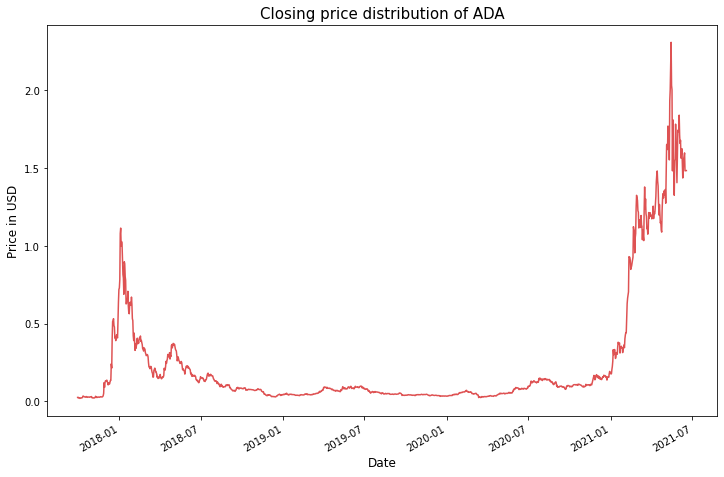

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of ADA", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-30,0.032226,0.017354,0.021678,0.024969,5.006870e+07,0.024969
2017-10-01,0.030088,0.019969,0.024607,0.025932,5.764130e+07,0.025932
2017-10-02,0.027425,0.020690,0.025757,0.020816,1.699780e+07,0.020816
2017-10-03,0.022806,0.020864,0.020864,0.021931,9.000050e+06,0.021931
2017-10-04,0.022154,0.020859,0.021951,0.021489,5.562510e+06,0.021489
...,...,...,...,...,...,...
2021-06-12,1.578513,1.402935,1.480494,1.558359,2.785909e+09,1.558359
2021-06-13,1.592704,1.510411,1.557019,1.575110,2.543903e+09,1.575110
2021-06-14,1.611401,1.545383,1.573870,1.597756,2.553206e+09,1.597756


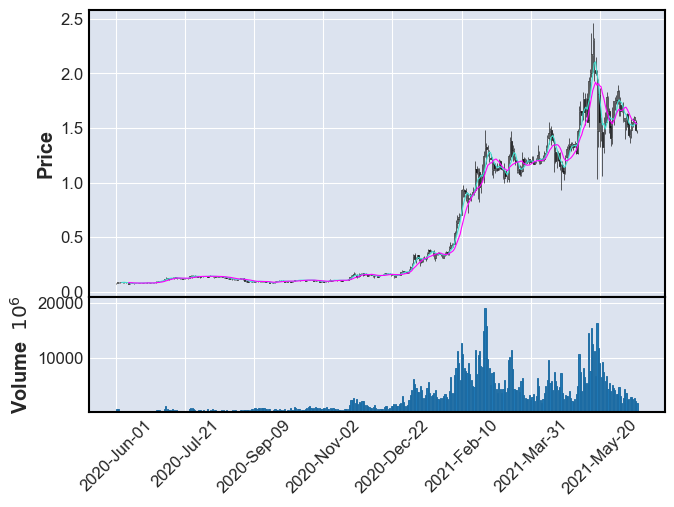

In [6]:
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [9]:
from fbprophet import Prophet

import data from Yahoo

In [10]:
base_df

,High,Low,Open,Close,Volume,Adj Close,Spread
Date,,,,,,,
2017-09-30,0.032226,0.017354,0.021678,0.024969,5.006870e+07,0.024969,0.014872
2017-10-01,0.030088,0.019969,0.024607,0.025932,5.764130e+07,0.025932,0.010119
2017-10-02,0.027425,0.020690,0.025757,0.020816,1.699780e+07,0.020816,0.006735
2017-10-03,0.022806,0.020864,0.020864,0.021931,9.000050e+06,0.021931,0.001942
2017-10-04,0.022154,0.020859,0.021951,0.021489,5.562510e+06,0.021489,0.001295
...,...,...,...,...,...,...,...
2021-06-12,1.578513,1.402935,1.480494,1.558359,2.785909e+09,1.558359,0.175578
2021-06-13,1.592704,1.510411,1.557019,1.575110,2.543903e+09,1.575110,0.082293
2021-06-14,1.611401,1.545383,1.573870,1.597756,2.553206e+09,1.597756,0.066018


In [11]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
975,2020-06-02,0.085439
976,2020-06-03,0.089000
977,2020-06-04,0.085442
978,2020-06-05,0.086026
979,2020-06-06,0.086654
...,...,...
1347,2021-06-12,1.558359
1348,2021-06-13,1.575110
1349,2021-06-14,1.597756
1350,2021-06-15,1.482573


In [12]:
m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
378,2021-06-21,1.795882,1.645364,1.936798
379,2021-06-22,1.793250,1.631526,1.937209
380,2021-06-23,1.821528,1.670599,1.965692
381,2021-06-24,1.808244,1.650681,1.964909
382,2021-06-25,1.812002,1.652117,1.954246


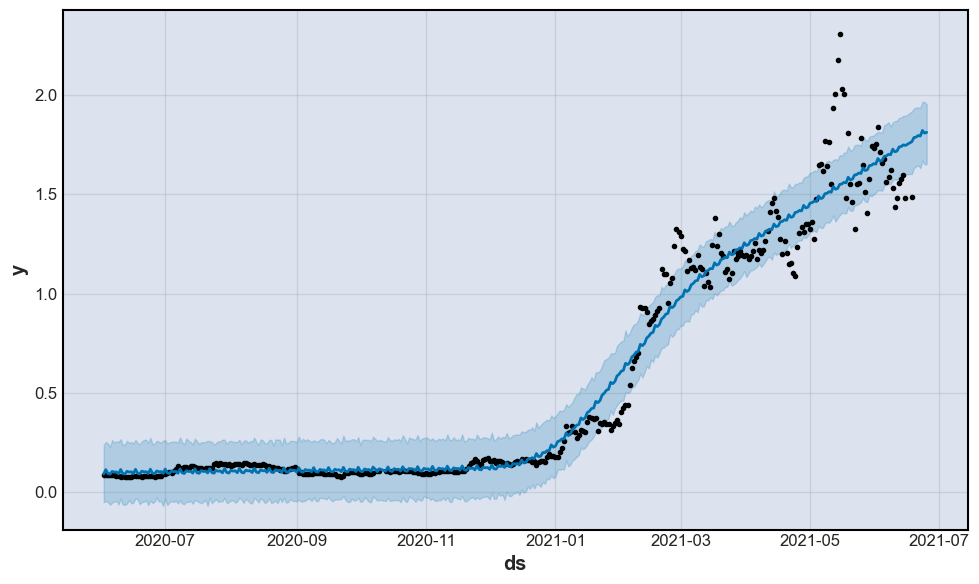

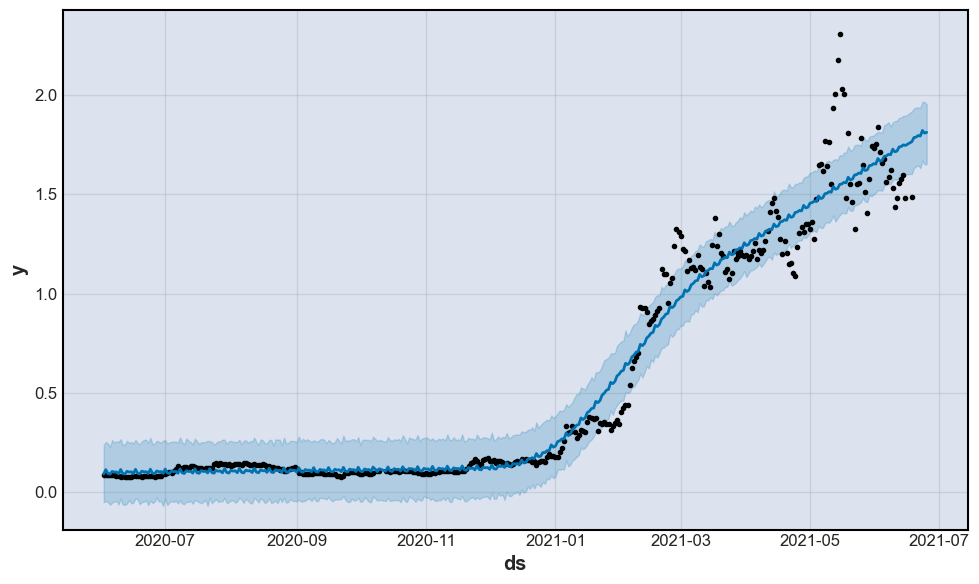

In [13]:
m.plot(forecast)

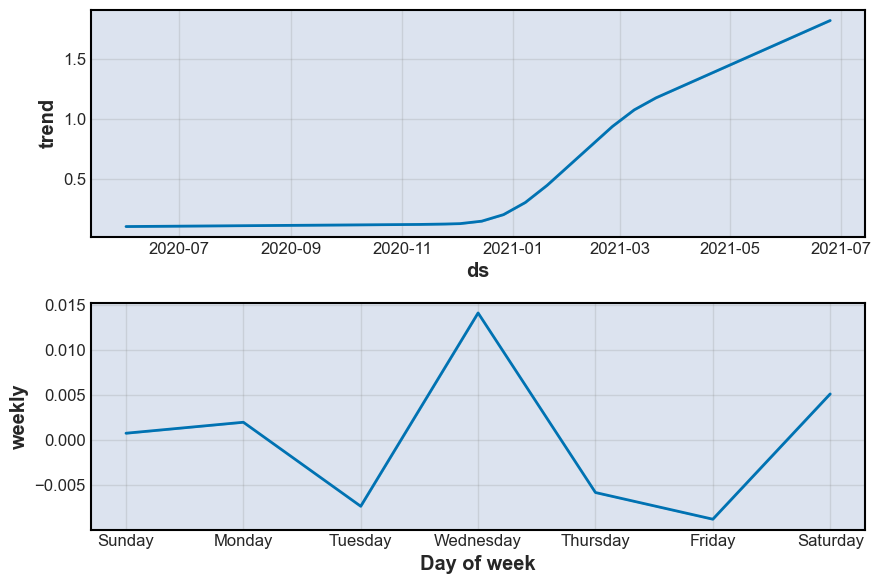

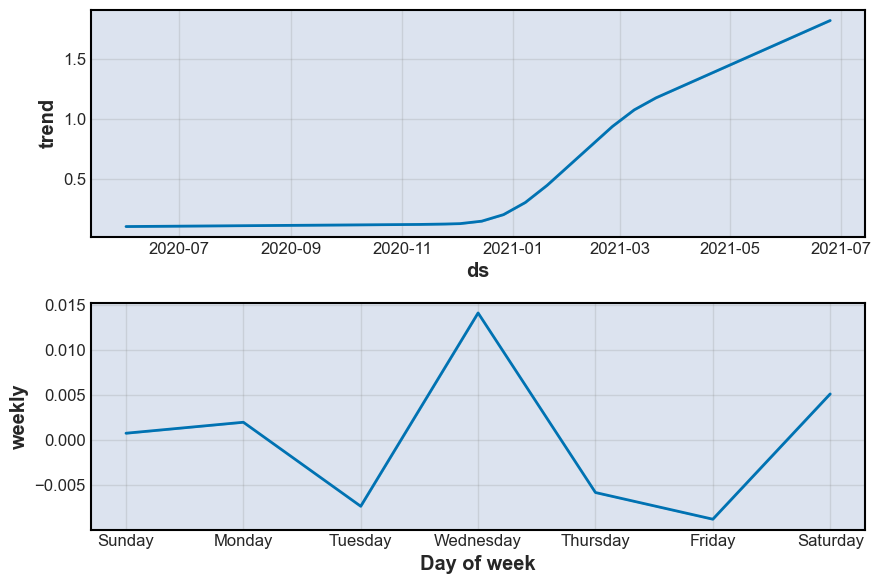

In [14]:
m.plot_components(forecast)